Implement experiments in Python using scikit-learn to explore the behavior of Random Forests. Use the
following datasets for your experiments:
• Tabular dataset: Heart Disease UCI


In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/AKTI DATA SCIENCE BATCH 8/IMS Machine Learning/heart_cleveland_upload Q2PB.csv")

In [ ]:
print(df)

     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     69    1   0       160   234    1        2      131      0      0.1   
1     69    0   0       140   239    0        0      151      0      1.8   
2     66    0   0       150   226    0        0      114      0      2.6   
3     65    1   0       138   282    1        2      174      0      1.4   
4     64    1   0       110   211    0        2      144      1      1.8   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
292   40    1   3       152   223    0        0      181      0      0.0   
293   39    1   3       118   219    0        0      140      0      1.2   
294   35    1   3       120   198    0        0      130      1      1.6   
295   35    0   3       138   183    0        0      182      0      1.4   
296   35    1   3       126   282    0        2      156      1      0.0   

     slope  ca  thal  condition  
0        1   1     0          0  
1        0   2     

In [ ]:
print(df.shape)
print(df.head())

(297, 14)
   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   69    1   0       160   234    1        2      131      0      0.1      1   
1   69    0   0       140   239    0        0      151      0      1.8      0   
2   66    0   0       150   226    0        0      114      0      2.6      2   
3   65    1   0       138   282    1        2      174      0      1.4      1   
4   64    1   0       110   211    0        2      144      1      1.8      1   

   ca  thal  condition  
0   1     0          0  
1   2     0          0  
2   0     0          0  
3   1     0          1  
4   0     0          0  


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        297 non-null    int64  
 1   sex        297 non-null    int64  
 2   cp         297 non-null    int64  
 3   trestbps   297 non-null    int64  
 4   chol       297 non-null    int64  
 5   fbs        297 non-null    int64  
 6   restecg    297 non-null    int64  
 7   thalach    297 non-null    int64  
 8   exang      297 non-null    int64  
 9   oldpeak    297 non-null    float64
 10  slope      297 non-null    int64  
 11  ca         297 non-null    int64  
 12  thal       297 non-null    int64  
 13  condition  297 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 32.6 KB


In [ ]:
df.isna().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


In [ ]:
df['condition'].unique()

array([0, 1])

In [ ]:
X = df.drop("condition", axis=1)
y = df["condition"]

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

In [ ]:
numeric_features = ["age", "trestbps", "chol", "thalach", "oldpeak"]
binary_features = ["sex", "fbs", "exang"]
categorical_features = ["cp", "restecg", "slope", "ca", "thal"]

In [ ]:
preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numeric_features),
        ("cat", OneHotEncoder(drop="first"), categorical_features),
        ("bin", "passthrough", binary_features),
    ]
)

In [ ]:
X_processed = preprocessor.fit_transform(X)

In [ ]:
print("\nFinal Feature Shape:", X_processed.shape)
print("\nFinal Feature:", X_processed)


Final Feature Shape: (297, 20)

Final Feature: [[ 1.60030243  1.59626645 -0.25717927 ...  1.          1.
   0.        ]
 [ 1.60030243  0.46841791 -0.16085866 ...  0.          0.
   0.        ]
 [ 1.26824154  1.03234218 -0.41129224 ...  0.          0.
   0.        ]
 ...
 [-2.16305433 -0.65943064 -0.95068766 ...  1.          0.
   1.        ]
 [-2.16305433  0.35563305 -1.23964948 ...  0.          0.
   0.        ]
 [-2.16305433 -0.32107608  0.66749858 ...  1.          0.
   1.        ]]


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X_processed, y, test_size=0.2, random_state=42, stratify=y
)

In [ ]:
print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)

Train shape: (237, 20)
Test shape: (60, 20)


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

In [ ]:
n_estimators_list = [1, 10, 50, 100, 300]
test_accuracies = []
conf_matrices = []

In [ ]:
for n in n_estimators_list:
    model = RandomForestClassifier(n_estimators=n, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    test_accuracies.append(acc)
    print(f"n_estimators = {n}  Test Accuracy = {acc:.4f}")

    cm = confusion_matrix(y_test, y_pred)
    conf_matrices.append(cm)
    print(f"Confusion Matrix:\n{cm}\n")

n_estimators = 1  Test Accuracy = 0.7500
Confusion Matrix:
[[24  8]
 [ 7 21]]

n_estimators = 10  Test Accuracy = 0.8000
Confusion Matrix:
[[31  1]
 [11 17]]

n_estimators = 50  Test Accuracy = 0.8333
Confusion Matrix:
[[30  2]
 [ 8 20]]

n_estimators = 100  Test Accuracy = 0.8167
Confusion Matrix:
[[30  2]
 [ 9 19]]

n_estimators = 300  Test Accuracy = 0.8333
Confusion Matrix:
[[30  2]
 [ 8 20]]



In [ ]:
import matplotlib.pyplot as plt

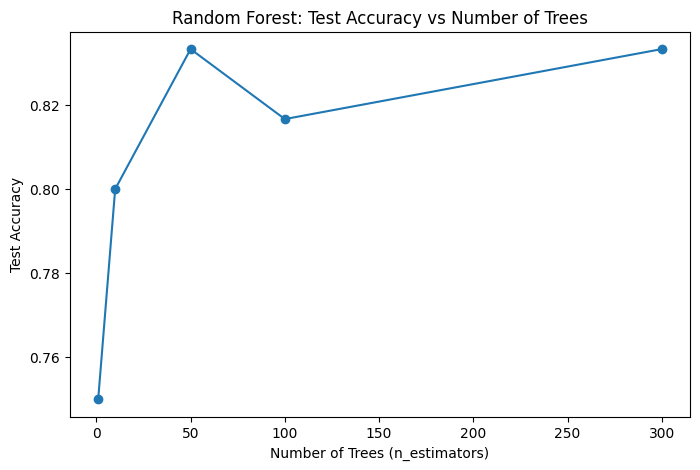

In [ ]:
plt.figure(figsize=(8,5))
plt.plot(n_estimators_list, test_accuracies, marker='o')
plt.title("Random Forest: Test Accuracy vs Number of Trees")
plt.xlabel("Number of Trees (n_estimators)")
plt.ylabel("Test Accuracy")
plt.show()

In [ ]:
from sklearn.tree import DecisionTreeClassifier
import time

In [ ]:
# Learned this from Chatgpt
start = time.time()
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
dt_time = time.time() - start
dt_acc = accuracy_score(y_test, dt.predict(X_test))

In [ ]:
start = time.time()
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
rf_time = time.time() - start
rf_acc = accuracy_score(y_test, rf.predict(X_test))

In [ ]:
print("MODEL COMPARISON")
print(f"Decision Tree    | Accuracy: {dt_acc:.4f} | Training Time: {dt_time:.6f} sec")
print(f"Random Forest    | Accuracy: {rf_acc:.4f} | Training Time: {rf_time:.6f} sec")
#Formated String used above

MODEL COMPARISON
Decision Tree    | Accuracy: 0.7833 | Training Time: 0.008333 sec
Random Forest    | Accuracy: 0.8167 | Training Time: 0.232630 sec


In [ ]:
models = ["Decision Tree", "Random Forest"]
accuracies = [dt_acc, rf_acc]
times = [dt_time, rf_time]


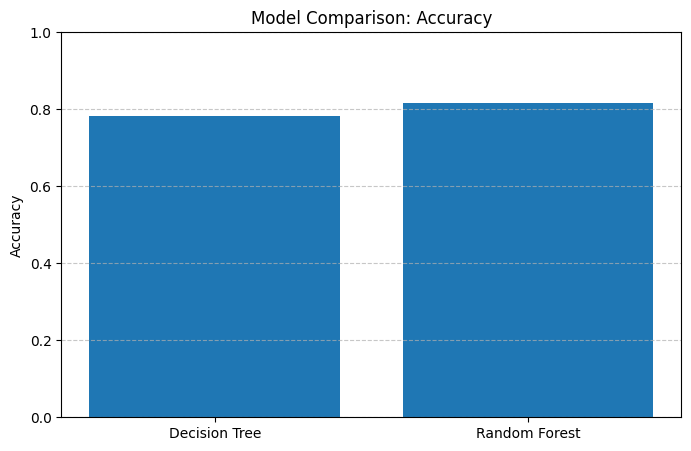

In [ ]:
plt.figure(figsize=(8,5))
plt.bar(models, accuracies)
plt.title("Model Comparison: Accuracy")
plt.ylabel("Accuracy")
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

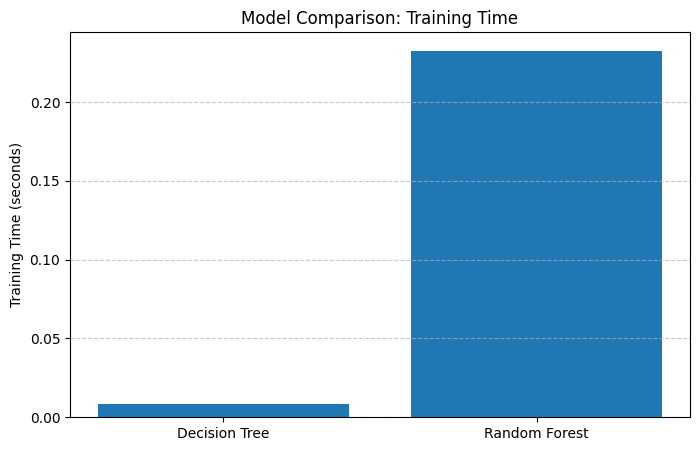

In [ ]:
plt.figure(figsize=(8,5))
plt.bar(models, times)
plt.title("Model Comparison: Training Time")
plt.ylabel("Training Time (seconds)")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()